In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

**Data Acquisition**

In [6]:
#importing the dataset from kaggle
!kaggle datasets download -d amol07/sunglasses-no-sunglasses

 98% 53.0M/54.0M [00:03<00:00, 18.6MB/s]
100% 54.0M/54.0M [00:03<00:00, 15.3MB/s]


In [7]:
#unzip the dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/sunglasses-no-sunglasses.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [15]:
#importing the libraries
import tensorflow as tf
import numpy as np
import cv2
import datetime
from tensorflow.keras.utils import load_img
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


**Data Pre-Processing**

In [28]:
#loading the dataset from directory & splitting
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/glasses_noGlasses/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/glasses_noGlasses/valid',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 3251 files belonging to 2 classes.
Found 604 files belonging to 2 classes.


In [31]:
#Normalize the data
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)  


**Model Building**

In [32]:
#Building the CNN Architecture

model= Sequential()

#first convolution layer with 32 Neurons
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Second convolution layer with 64 Neurons
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Third convolution layer with 128 Neurons
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

#Layer flattening
model.add(Flatten())

#First dense layer with 10% dropouts
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
#second dense layer with again 10% dropouts
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))

#Output layer
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

**Model training**

In [34]:
# Model training with compilation
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_saved = model.fit_generator(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10


<ipython-input-34-c42c2d1341ba>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model_saved = model.fit_generator(train_ds,epochs=10,validation_data=validation_ds)


102/102 [==============================] - 588s 6s/step - loss: 0.9502 - accuracy: 0.9625 - val_loss: 3.5694 - val_accuracy: 0.6474
Epoch 2/10
102/102 [==============================] - 570s 6s/step - loss: 0.4904 - accuracy: 0.9837 - val_loss: 6.1719 - val_accuracy: 0.5977
Epoch 3/10
102/102 [==============================] - 568s 6s/step - loss: 0.4279 - accuracy: 0.9859 - val_loss: 3.5210 - val_accuracy: 0.7533
Epoch 4/10
102/102 [==============================] - 571s 6s/step - loss: 0.3535 - accuracy: 0.9883 - val_loss: 1.3671 - val_accuracy: 0.9205
Epoch 5/10
102/102 [==============================] - 566s 6s/step - loss: 0.2471 - accuracy: 0.9942 - val_loss: 0.9758 - val_accuracy: 0.9752
Epoch 6/10
102/102 [==============================] - 569s 6s/step - loss: 0.1184 - accuracy: 0.9957 - val_loss: 0.7898 - val_accuracy: 0.9801
Epoch 7/10
102/102 [==============================] - 568s 6s/step - loss: 0.1070 - accuracy: 0.9951 - val_loss: 3.0133 - val_accuracy: 0.8940
Epoch 8/10

In [35]:
#saving the model
model.save('/content/mymodel.h5',model_saved)

**Model Evaluation**

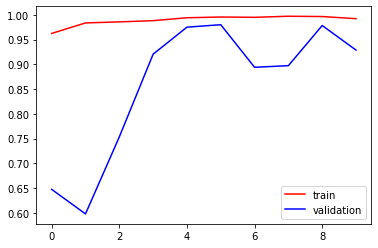

In [39]:
#plotting graph for accuracy
import matplotlib.pyplot as plt
plt.plot(model_saved.history['accuracy'],color='red',label='train')
plt.plot(model_saved.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

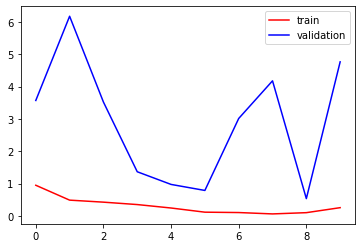

In [42]:
#plotting graph for loss
import matplotlib.pyplot as plt
plt.plot(model_saved.history['loss'],color='red',label='train')
plt.plot(model_saved.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

**Model testing with random photo**

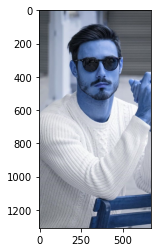

In [64]:
import cv2
test_img = cv2.imread("/content/with2.jpg")
plt.imshow(test_img)

In [69]:
test_img.shape
test_img=cv2.resize(test_img,(256,256))
test_input=test_img.reshape((1,256,256,3))
result = model.predict(test_input)

1/1 [==============================] - 0s 146ms/step


In [70]:
if result[0][0]==1:
  prediction="with glasses"
else:
  prediction='without glasses'  

print(prediction)  

with glasses
